### Imports & Load Data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('bike sharing demand/train.csv')
test_df = pd.read_csv('bike sharing demand/test.csv')

### EDA & Visuals

In [3]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
# NANs check
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
test_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

- There's `no NaNs`

In [9]:
# Duplicates check
train_df.duplicated().sum()

0

In [10]:
test_df.duplicated().sum()

0

- There's `no duplicates`

In [44]:
# Datasets statistics
train_df.describe()

,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,day-of-week,week_end,rush_hour,sleepy_hour,improper_humidity
count,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,1.418427,20.23086,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,2.980066,0.290557,0.125574,0.246555,0.354768
std,0.166599,0.466159,0.633839,7.79159,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,2.002357,0.454040,0.331384,0.431025,0.478465
min,0.000000,0.000000,1.000000,0.82000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,13.94000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,20.50000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.000000,26.24000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,5.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,4.000000,41.00000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,6.000000,1.000000,1.000000,1.000000,1.000000


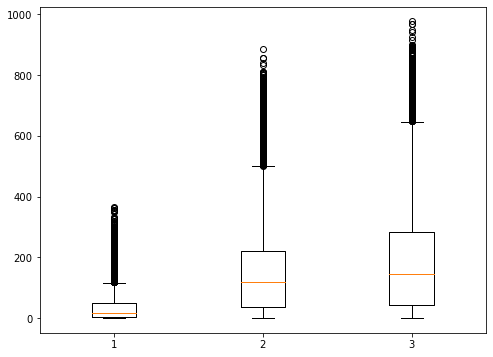

In [61]:
# box plotting casual, registed and count
plt.figure(figsize=(8, 6))
plt.boxplot([train_df['casual'], train_df['registered'], train_df['count']]);

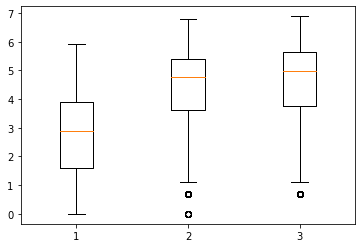

In [63]:
plt.boxplot([np.log1p(train_df['casual']), np.log1p(train_df['registered']), np.log1p(train_df['count'])]);

- Using log 1 positive with casual and registed columns will affect well in modeling as almost no outliers.

In [11]:
# Extracting year, month, day, hour from datetime feature

train_df['datetime'] = pd.to_datetime(train_df['datetime'], format='%Y-%m-%d %H')
test_df['datetime'] = pd.to_datetime(test_df['datetime'], format='%Y-%m-%d %H')

train_df['year'] = train_df['datetime'].dt.year
test_df['year'] = test_df['datetime'].dt.year

train_df['month'] = train_df['datetime'].dt.month
test_df['month'] = test_df['datetime'].dt.month

train_df['day'] = train_df['datetime'].dt.day
test_df['day'] = test_df['datetime'].dt.day

train_df['hour'] = train_df['datetime'].dt.hour
test_df['hour'] = test_df['datetime'].dt.hour

train_df['day-of-week'] = train_df['datetime'].dt.day_name()
test_df['day-of-week'] = test_df['datetime'].dt.day_name()

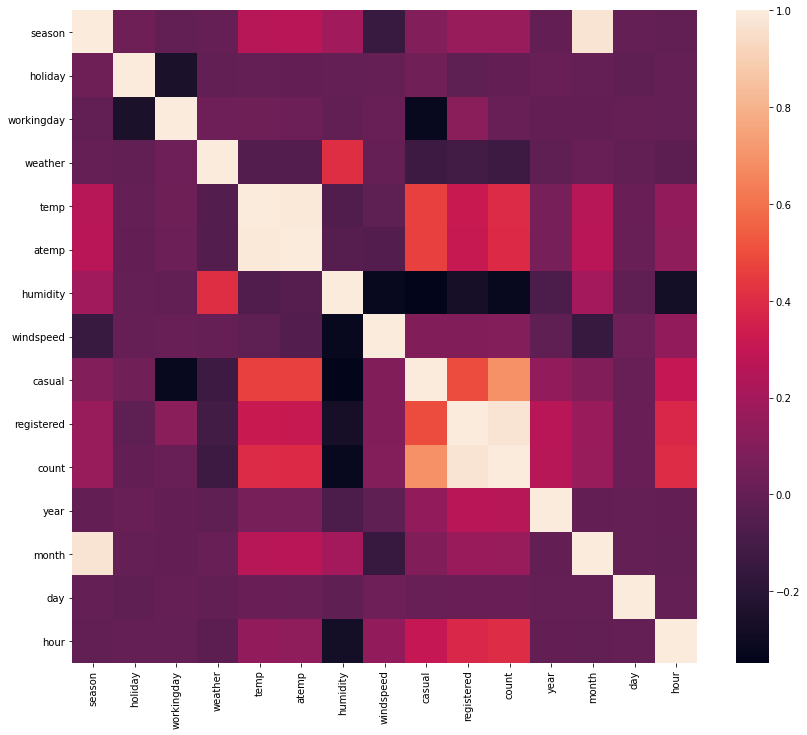

In [12]:
# feature correlation
plt.figure(figsize=(14, 12))
sns.heatmap(train_df.corr());

In [13]:
train_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


- Theres `high collinearity` between:
    - `temp` and `atemp`, so we can drop one of them
    - `season` and `month`, so we can drop one of them

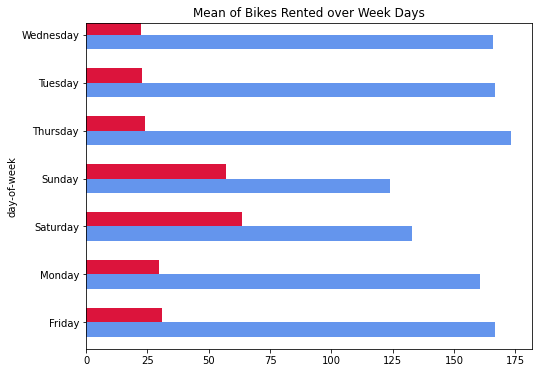

In [14]:
# Check mean of bike rented per days of week
plt.figure(figsize=(8,6))
train_df.groupby('day-of-week')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('day-of-week')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Week Days');

- We can notice that `weekend (Saturday and Monday)` has significant difference in mean rents even in casual or registerd ones.

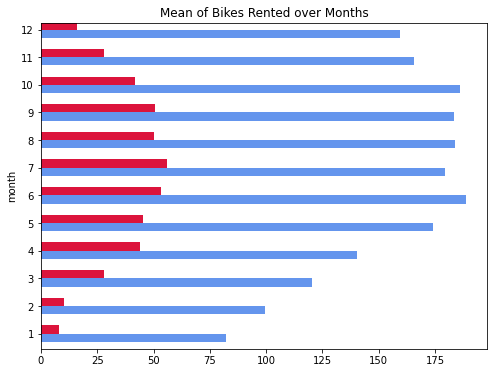

In [15]:
# Check mean of bike rented per months
plt.figure(figsize=(8,6))
train_df.groupby('month')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('month')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Months');

- Mean rents significantly `decreases in January and February`, and `highly increases between May to October`.

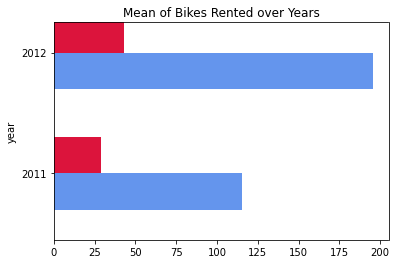

In [16]:
# Check mean of bike rented per year
train_df.groupby('year')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('year')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Years');

- Mean rents in `2012 is higher than 2011`

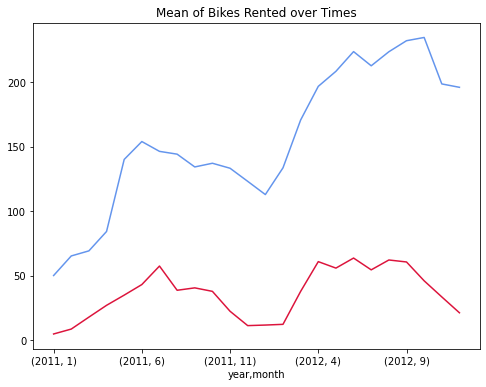

In [17]:
# Check mean of bike rented Over times
plt.figure(figsize=(8,6))
train_df.groupby(['year', 'month'])['casual'].mean().plot(color='crimson');
train_df.groupby(['year', 'month'])['registered'].mean().plot(color='cornflowerblue');
plt.title('Mean of Bikes Rented over Times');

- We notice that over time during year the mean rents differs, so the feature of year and month will affect well in model.

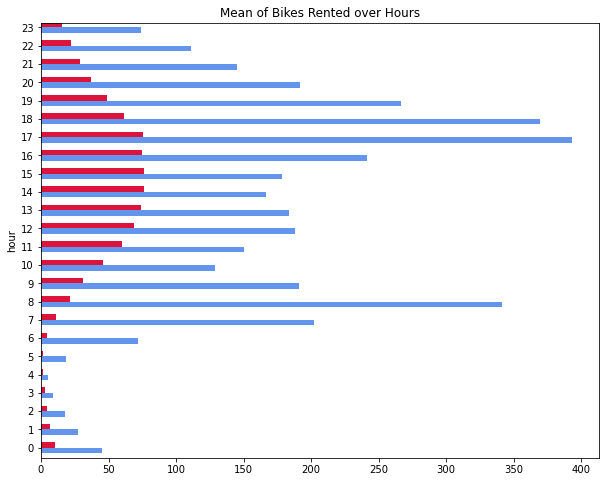

In [18]:
# Check mean of bike rented per hour
plt.figure(figsize=(10, 8))
train_df.groupby('hour')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('hour')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Hours');

- Mean of rents significantly `decreases at midnight till the dawn`
- Registed rents`highly increases at 8 AM and 17, 18 PM`.

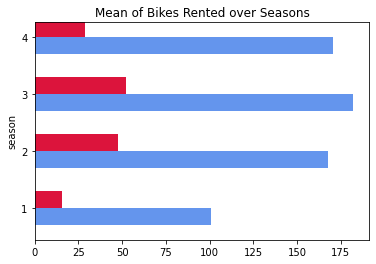

In [19]:
# Check mean of bike rented over seasons
train_df.groupby('season')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('season')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Seasons');

Mean rents `increases` in season `Summer and Fall` rather than Winter and Spring

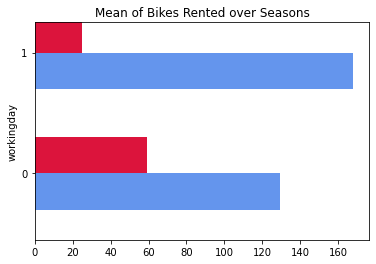

In [20]:
# Check mean of bike rented over workingday
train_df.groupby('workingday')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('workingday')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Seasons');

-  `Casual` rents increases in `No workingdays` when `Registed` rents increases in `workingdays`



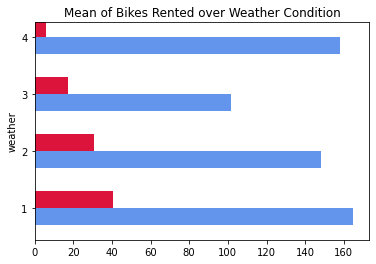

In [21]:
# Check mean of bike rented over weather condition
train_df.groupby('weather')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('weather')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Weather Condition');

- Mean rents increases in Clear, Few clouds, Partly cloudy, Partly cloudy weather

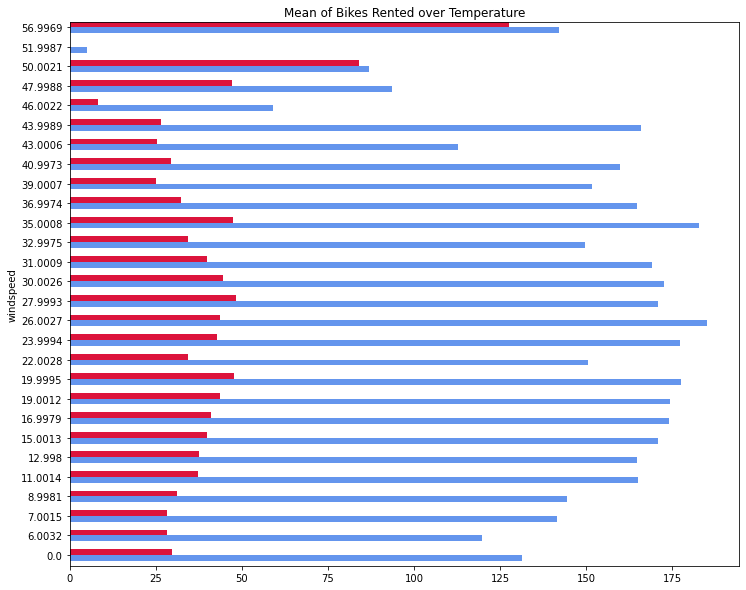

In [45]:
# Check mean of bike rented over temperature
plt.figure(figsize=(12, 10))
train_df.groupby('temp')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('temp')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Temperature');

- Mean rents `increases` when the `tempeature increases`

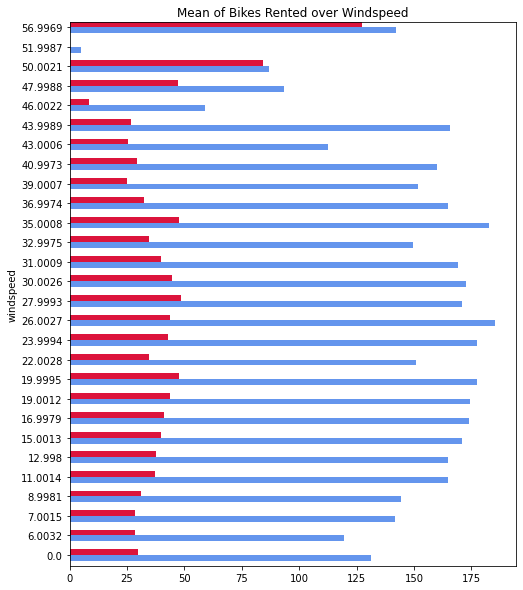

In [48]:
# Check mean of bike rented over windspeed
plt.figure(figsize=(8, 10))
train_df.groupby('windspeed')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('windspeed')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Windspeed');

- this feature won't affect well in modeling as almost all windspeeds has ths same mean rents

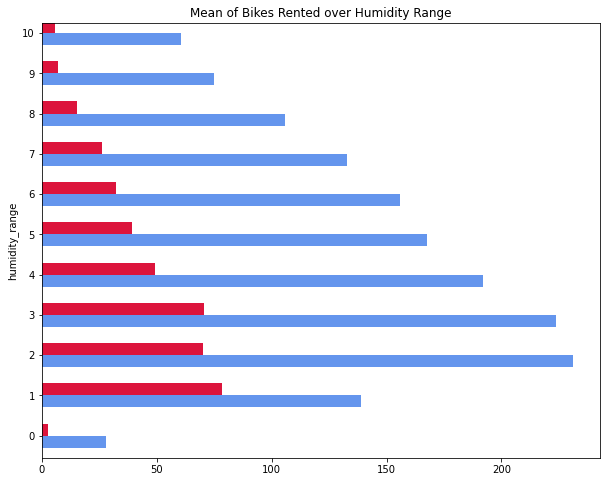

In [23]:
# Check mean of bike rented over humidity range
train_df['humidity_range'] = train_df['humidity']/10
train_df['humidity_range'] = train_df['humidity_range'].astype(int)

plt.figure(figsize=(10, 8))
train_df.groupby('humidity_range')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('humidity_range')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Humidity Range');

train_df.drop('humidity_range', axis=1, inplace=True)

- Mean rents `decreases` when the `humidity increases`, except below 10%

### Feature Engineering & Extra EDA

In [24]:
# Extracting weekends
train_df['week_end'] = train_df['day-of-week'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
test_df['week_end'] = test_df['day-of-week'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

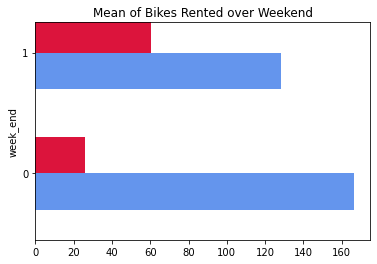

In [25]:
# Check mean of bike rented over weekend
train_df.groupby('week_end')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('week_end')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Weekend');

- The feature will affect well in model 

In [26]:
# Extracting rush_hour
train_df['rush_hour'] = train_df['hour'].apply(lambda x: 1 if x == 8 or x == 17 or x == 18 else 0)
test_df['rush_hour'] = test_df['hour'].apply(lambda x: 1 if x == 8 or x == 17 or x == 18 else 0)

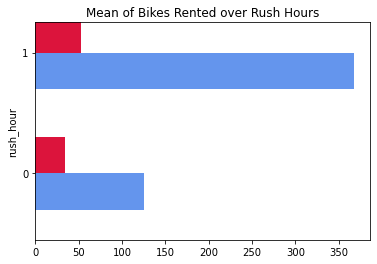

In [27]:
# Check mean of bike rented over rush hours
train_df.groupby('rush_hour')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('rush_hour')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Rush Hours');

- The feature will affect very `well` in prediction the `registered` rents `not` the `casual`.

In [28]:
# Extracting sleepy hours
train_df['sleepy_hour'] = train_df['hour'].apply(lambda x: 1 if x in [0, 1, 2, 3, 4, 5] else 0)
test_df['sleepy_hour'] = test_df['hour'].apply(lambda x: 1 if x in [0, 1, 2, 3, 4, 5] else 0)

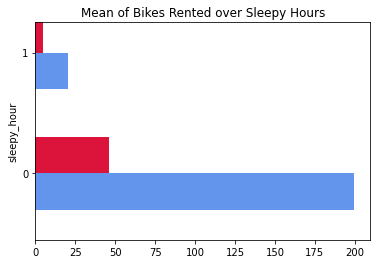

In [29]:
# Check mean of bike rented over sleepy hours
train_df.groupby('sleepy_hour')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('sleepy_hour')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Sleepy Hours');

- The feature will affect very well in model prediction.

In [30]:
# Extracting improper humidity
train_df['improper_humidity'] = train_df['humidity'].apply(lambda x: 1 if x < 10 or x > 70 else 0)
test_df['improper_humidity'] = test_df['humidity'].apply(lambda x: 1 if x < 10 or x > 70 else 0)

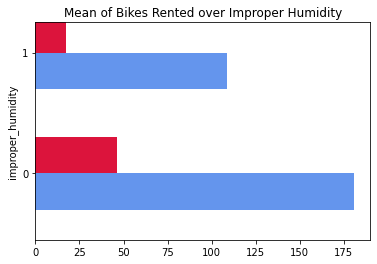

In [31]:
# Check mean of bike rented over improper humidity
train_df.groupby('improper_humidity')['casual'].mean().plot(kind='barh', color='crimson', width=0.3,  position=0);
train_df.groupby('improper_humidity')['registered'].mean().plot(kind='barh', color='cornflowerblue', width=0.3, position=1);
plt.title('Mean of Bikes Rented over Improper Humidity');

- The feature will affect in model prediction.

### Pre-Processing

In [36]:
# Drop high collinearity features
train_df.drop(['atemp', 'season'], axis=1, inplace=True)
test_df.drop(['atemp', 'season'], axis=1, inplace=True)

In [40]:
# Setting datetime as index
train_df = train_df.set_index('datetime')
test_df = test_df.set_index('datetime')

In [42]:
# Label Encoding Day featue

for col in ['day-of-week']:
    train_df[col] = pd.factorize(train_df[col])[0].reshape(-1,1)
    test_df[col] = pd.factorize(test_df[col])[0].reshape(-1,1)

### Modeling

In [147]:
def model_outcome(x, y, model):
    
    # spliiting train and validation data
    x_train, x_valid, y_train, y_valid = train_test_split(x, y , test_size = 0.2, stratify=train_df['month'], random_state = 0)
    
    # fitting model
    model.fit(x_train, y_train)
    
    # prediction train and validation datasets
    train_pred = model.predict(x_train)
    valid_pred = model.predict(x_valid)

    #calulation errors
    print('Training R2 score: {}'.format(r2_score(y_train, train_pred)))
    print('Validation R2 score: {}'.format(r2_score(y_valid, valid_pred)))

    print('Training RMSLE: {}'.format(np.sqrt(np.square(y_train - train_pred).mean())))
    print('Training RMSLE: {}'.format(np.sqrt(np.square(y_valid - valid_pred).mean())))

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [64]:
x = train_df.drop(['casual', 'registered', 'count'], axis=1)
y_casual = np.log1p(train_df['casual'])
y_registered = np.log1p(train_df['casual'])

In [73]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

print('Casual Rents Prediction Model')
model_outcome(x, y_casual, lr_model)
print('\nRegistered Rents Prediction Model')
model_outcome(x, y_registered, lr_model)

Casual Rents Prediction Model
Training R2 score: 0.7050211958205839
Validation R2 score: 0.6980396811257472
Training RMSLE: 0.8113717723614391
Training RMSLE: 0.8125234217491802

Registered Rents Prediction Model
Training R2 score: 0.7050211958205839
Validation R2 score: 0.6980396811257472
Training RMSLE: 0.8113717723614391
Training RMSLE: 0.8125234217491802


In [81]:
# SVR
from sklearn.svm import SVR
svr_model = SVR(kernel='sigmoid')
    
print('Casual Rents Prediction Model')
model_outcome(x, y_casual, svr_model)
print('\nRegistered Rents Prediction Model')
model_outcome(x, y_registered, svr_model)

Casual Rents Prediction Model
Training R2 score: 0.06018722082942507
Validation R2 score: 0.06830559164317929
Training RMSLE: 1.44825541905611
Training RMSLE: 1.4272422572098569

Registered Rents Prediction Model
Training R2 score: 0.06018722082942507
Validation R2 score: 0.06830559164317929
Training RMSLE: 1.44825541905611
Training RMSLE: 1.4272422572098569


In [129]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
    
print('Casual Rents Prediction Model')
model_outcome(x, y_casual, knn_model)
print('\nRegistered Rents Prediction Model')
model_outcome(x, y_registered, knn_model)

Casual Rents Prediction Model
Training R2 score: 0.8412153943358949
Validation R2 score: 0.7516979539794243
Training RMSLE: 0.5952901363575458
Training RMSLE: 0.7368025160070438

Registered Rents Prediction Model
Training R2 score: 0.8412153943358949
Validation R2 score: 0.7516979539794243
Training RMSLE: 0.5952901363575458
Training RMSLE: 0.7368025160070438


In [89]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=8)
    
print('Casual Rents Prediction Model')
model_outcome(x, y_casual, dt_model)
print('\nRegistered Rents Prediction Model')
model_outcome(x, y_registered, dt_model)

Casual Rents Prediction Model
Training R2 score: 0.88463079301641
Validation R2 score: 0.83688732306027
Training RMSLE: 0.507422175413523
Training RMSLE: 0.5971793871187684

Registered Rents Prediction Model
Training R2 score: 0.8846307930164101
Validation R2 score: 0.83688732306027
Training RMSLE: 0.507422175413523
Training RMSLE: 0.5971793871187682


In [114]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=40, max_depth=10, random_state=0)
    
print('Casual Rents Prediction Model')
model_outcome(x, y_casual, rf_model)
print('\nRegistered Rents Prediction Model')
model_outcome(x, y_registered, rf_model)

Casual Rents Prediction Model
Training R2 score: 0.9393611623694536
Validation R2 score: 0.8785785435596084
Training RMSLE: 0.3678747018155896
Training RMSLE: 0.5152389304823516

Registered Rents Prediction Model
Training R2 score: 0.9393611623694536
Validation R2 score: 0.8785785435596084
Training RMSLE: 0.3678747018155896
Training RMSLE: 0.5152389304823516


In [120]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
et_model = ExtraTreesRegressor(n_estimators=45, max_depth=11, random_state=0)
    
print('Casual Rents Prediction Model')
model_outcome(x, y_casual, et_model)
print('\nRegistered Rents Prediction Model')
model_outcome(x, y_registered, et_model)

Casual Rents Prediction Model
Training R2 score: 0.94860990685049
Validation R2 score: 0.8815483508678036
Training RMSLE: 0.3386602242485094
Training RMSLE: 0.5088988938428616

Registered Rents Prediction Model
Training R2 score: 0.94860990685049
Validation R2 score: 0.8815483508678036
Training RMSLE: 0.3386602242485094
Training RMSLE: 0.5088988938428616


In [148]:
# Extra Trees Regressor
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 45, 'max_depth': 9, 'random_state': 0,
          'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**params) 

print('Casual Rents Prediction Model')
model_outcome(x, y_casual, gbm_model)
print('\nRegistered Rents Prediction Model')
model_outcome(x, y_registered, gbm_model)

Casual Rents Prediction Model
Training R2 score: 0.9518607778373394
Validation R2 score: 0.8982615650018757
Training RMSLE: 0.3277736395457548
Training RMSLE: 0.47163223175730007

Registered Rents Prediction Model
Training R2 score: 0.9518607778373394
Validation R2 score: 0.8982615650018757
Training RMSLE: 0.3277736395457548
Training RMSLE: 0.47163223175730007


### Result

In [154]:
test_casual_predict = gbm_model.fit(x, y_casual).predict(test_df)
test_registered_predict = gbm_model.fit(x, y_registered).predict(test_df)

In [155]:
test_casual_predict = np.expm1(test_casual_predict)
test_registered_predict = np.expm1(test_registered_predict)

test_count_predict = test_casual_predict + test_registered_predict

In [156]:
# Saving test predictions to file
output = pd.DataFrame({"datetime": test_df.index, "count" : test_count_predict})
output.to_csv('sampleSubmission.csv', index=False)